In [6]:
%pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [ ]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib.pyplot
%pip install statsmodels
%pip install pymorphy3
%pip install wordcloud

In [4]:
import pandas as pd

# Замени 'your_data.csv' на имя твоего файла
df = pd.read_csv('D:\мои проекты\intensiv4\разметка комментариев 2.csv')

# Выведи первые несколько строк, чтобы посмотреть на данные
print(df.head())

        id  rating                                       comment  \
0  2945792       5                                       спасибо   
1  3234340       5                                      спасибо!   
2  3380332       5                                      Отлично    
3  3381812       5  Благодарю за оперативное решение проблемы !    
4  3461991       5         Прекрасный специалист! Побольше таких   

   Нравится скорость отработки заявок  Нравится качество выполнения заявки  \
0                                 NaN                                  NaN   
1                                 NaN                                  NaN   
2                                 NaN                                  NaN   
3                                 NaN                                  NaN   
4                                 NaN                                  NaN   

   Нравится качество работы сотрудников  Понравилось выполнение заявки  \
0                                   NaN         

<>:4: SyntaxWarning: invalid escape sequence '\i'
<>:4: SyntaxWarning: invalid escape sequence '\i'
C:\Users\admin\AppData\Local\Temp\ipykernel_14732\879522205.py:4: SyntaxWarning: invalid escape sequence '\i'
  df = pd.read_csv('D:\мои проекты\intensiv4\разметка комментариев 2.csv')


In [5]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    2373 non-null   int64  
 1   rating                                2373 non-null   int64  
 2   comment                               2373 non-null   object 
 3   Нравится скорость отработки заявок    0 non-null      float64
 4   Нравится качество выполнения заявки   0 non-null      float64
 5   Нравится качество работы сотрудников  0 non-null      float64
 6   Понравилось выполнение заявки         0 non-null      float64
 7   Вопрос решен                          0 non-null      float64
dtypes: float64(5), int64(2), object(1)
memory usage: 148.4+ KB
None
                 id       rating  Нравится скорость отработки заявок  \
count  2.373000e+03  2373.000000                                 0.0   
mean   4.04

In [6]:
duplicates = df.duplicated()
print("Количество дубликатов:", duplicates.sum())
df = df.drop_duplicates()
df = df.reset_index(drop=True) # Важно сбросить индекс после удаления строк.
print("Размер датафрейма после удаления дубликатов:", df.shape)

Количество дубликатов: 65
Размер датафрейма после удаления дубликатов: (2308, 8)


In [7]:
category_columns = ['Нравится скорость отработки заявок', 'Нравится качество выполнения заявки', 'Нравится качество работы сотрудников', 'Понравилось выполнение заявки', 'Вопрос решен']
for col in category_columns:
    print(f"Распределение класса '{col}':")
    print(df[col].value_counts())

Распределение класса 'Нравится скорость отработки заявок':
Series([], Name: count, dtype: int64)
Распределение класса 'Нравится качество выполнения заявки':
Series([], Name: count, dtype: int64)
Распределение класса 'Нравится качество работы сотрудников':
Series([], Name: count, dtype: int64)
Распределение класса 'Понравилось выполнение заявки':
Series([], Name: count, dtype: int64)
Распределение класса 'Вопрос решен':
Series([], Name: count, dtype: int64)


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(20,10)})

In [6]:
train = pd.read_csv('D:\мои проекты\intensiv4\разметка комментариев 2.csv')
train

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\admin\AppData\Local\Temp\ipykernel_13248\4180064825.py:1: SyntaxWarning: invalid escape sequence '\i'
  train = pd.read_csv('D:\мои проекты\intensiv4\разметка комментариев 2.csv')


,id,rating,comment,Нравится скорость отработки заявок,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Понравилось выполнение заявки,Вопрос решен
0,2945792,5,спасибо,NaN,NaN,NaN,NaN,NaN
1,3234340,5,спасибо!,NaN,NaN,NaN,NaN,NaN
2,3380332,5,Отлично,NaN,NaN,NaN,NaN,NaN
3,3381812,5,Благодарю за оперативное решение проблемы !,NaN,NaN,NaN,NaN,NaN
4,3461991,5,Прекрасный специалист! Побольше таких,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2368,3507812,5,"долго, но приятно",NaN,NaN,NaN,NaN,NaN
2369,3478532,5,16.03.2024 г ребята установили кондиционер. ра...,NaN,NaN,NaN,NaN,NaN
2370,3296403,5,два дня мусоропровод. сегодня с утра тоже,NaN,NaN,NaN,NaN,NaN
2371,3165822,5,отрегулировать дверь замки . для должного откр...,NaN,NaN,NaN,NaN,NaN


In [1]:
import pandas as pd
import re

def clean_text(text):
    """
    Очищает текст:
        - Оставляет только кириллические символы, цифры и пробелы.
        - Приводит к нижнему регистру.
        - Удаляет лишние пробелы.
        - Обрабатывает не строковые значения.
    """
    if not isinstance(text, str):
        return ""  # Возвращаем пустую строку, если значение не является строкой

    # Удаляем все символы, кроме кириллических, цифр и пробелов
    cleaned_text = re.sub(r'[^а-яА-ЯёЁ0-9\s]', ' ', text)

    # Заменяем множественные пробелы на одинарные
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)

    # Приводим к нижнему регистру и обрезаем пробелы по краям
    return cleaned_text.lower().strip()


# Загрузка данных
file_path = 'D:\мои проекты\intensiv4\разметка комментариев 2.csv'
data = None  # Инициализируем data в None
try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Ошибка: Файл '{file_path}' не найден.")
    # Создаем пустой DataFrame, чтобы избежать ошибки NameError
    data = pd.DataFrame()
except Exception as e:
    print(f"Ошибка при чтении файла: {e}")
    data = pd.DataFrame()


# Переименование столбца 'Текст комментария' в 'comment', если он существует
if data is not None and 'Текст комментария' in data.columns:
    data = data.rename(columns={'Текст комментария': 'comment'})

# Проверяем наличие столбца 'comment'
if data is not None and 'comment' not in data.columns:
    print("Ошибка: Столбец 'comment' не найден в файле.")
    #  Можно здесь тоже создать DataFrame с одной строкой и пустым столбцом 'comment', если это необходимо для дальнейшей работы
    # data = pd.DataFrame({'comment': ['']})
    exit() # Лучше завершить выполнение, если нет столбца с комментариями

# Очистка текста в колонке 'comment'
if data is not None and 'comment' in data.columns:
    data['comment'] = data['comment'].apply(clean_text)


# Удаление дубликатов и пустых значений
# Добавлена проверка на наличие столбцов перед операциями
if data is not None and 'comment' in data.columns:
    data = data.drop_duplicates(subset=['comment'])  # Указываем subset явно
    data = data.dropna(subset=['comment'])
    data = data[data['comment'] != '']  # Фильтруем строки, где 'comment' не равно пустой строке
else:
    print("Предупреждение: Столбец 'comment' не найден, пропуск удаления дубликатов и пустых значений.")


# Вывод информации о данных после обработки
if data is not None:
    print("Информация о данных после очистки:")
    print(data.info())
    print("\nПервые 5 строк после очистки:")
    print(data.head())

# Сохранение очищенных данных
if data is not None:
    try:
        data.to_csv('cleaned_data_proto.csv', index=False, encoding='utf-8')
        print("Очищенные данные сохранены в файл 'cleaned_data_proto.csv'")
    except Exception as e:
        print(f"Ошибка при сохранении файла: {e}")

<>:26: SyntaxWarning: invalid escape sequence '\i'
<>:26: SyntaxWarning: invalid escape sequence '\i'
C:\Users\admin\AppData\Local\Temp\ipykernel_13316\1099927945.py:26: SyntaxWarning: invalid escape sequence '\i'
  file_path = 'D:\мои проекты\intensiv4\разметка комментариев 2.csv'


Информация о данных после очистки:
<class 'pandas.core.frame.DataFrame'>
Index: 1525 entries, 0 to 2372
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    1525 non-null   int64  
 1   rating                                1525 non-null   int64  
 2   comment                               1525 non-null   object 
 3   Нравится скорость отработки заявок    0 non-null      float64
 4   Нравится качество выполнения заявки   0 non-null      float64
 5   Нравится качество работы сотрудников  0 non-null      float64
 6   Понравилось выполнение заявки         0 non-null      float64
 7   Вопрос решен                          0 non-null      float64
dtypes: float64(5), int64(2), object(1)
memory usage: 107.2+ KB
None

Первые 5 строк после очистки:
        id  rating                                    comment  \
0  2945792       5           

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка очищенных данных
try:
    data = pd.read_csv('D:\мои проекты\intensiv4\разметка комментариев 2.csv')
except FileNotFoundError:
    print("Ошибка: Файл 'D:\мои проекты\intensiv4\разметка комментариев 2.csv' не найден.")
    exit()

# Убедимся, что столбец 'comment' существует
if 'comment' not in data.columns:
    print("Ошибка: Столбец 'comment' не найден.")
    exit()

<>:8: SyntaxWarning: invalid escape sequence '\i'
<>:10: SyntaxWarning: invalid escape sequence '\i'
<>:8: SyntaxWarning: invalid escape sequence '\i'
<>:10: SyntaxWarning: invalid escape sequence '\i'
C:\Users\admin\AppData\Local\Temp\ipykernel_15532\2913898091.py:8: SyntaxWarning: invalid escape sequence '\i'
  data = pd.read_csv('D:\мои проекты\intensiv4\разметка комментариев 2.csv')
C:\Users\admin\AppData\Local\Temp\ipykernel_15532\2913898091.py:10: SyntaxWarning: invalid escape sequence '\i'
  print("Ошибка: Файл 'D:\мои проекты\intensiv4\разметка комментариев 2.csv' не найден.")


In [2]:
# Количество отзывов
total_reviews = len(data)
print(f"Общее количество отзывов: {total_reviews}")

Общее количество отзывов: 2373


In [3]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    # Оставляем буквы, цифры, пробелы и знаки препинания
    cleaned_text = re.sub(r'[^а-яА-ЯёЁ0-9\s\.,?!-]', ' ', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    return cleaned_text.lower().strip()

In [4]:
import pandas as pd
import re

def clean_text(text):
    """Очищает текст: оставляет только кириллические символы, цифры и пробелы."""
    if not isinstance(text, str):
        return ""
    cleaned_text = re.sub(r'[^а-яА-ЯёЁ0-9\s]', ' ', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    return cleaned_text.lower().strip()

def categorize_comment(comment):
    """Автоматически размечает комментарий по категориям на основе ключевых слов."""
    categories = {
        "speed": False,
        "quality": False,
        "staff": False,
        "execution": False,
        "solved": False
    }

    # comment = clean_text(comment)  # Убираем очистку текста здесь

    if any(keyword in comment for keyword in ["быстро", "оперативно", "моментально", "срочно", "своевременно", "короткий срок", "сразу", "минут", "час", "шустро"]):
        categories["speed"] = True
    if any(keyword in comment for keyword in ["качественно", "отлично", "хорошо", "профессионально", "идеально", "безупречно", "аккуратно", "надежно", "прочно", "долговечно", "замечательно", "здорово", "соответствует", "супер"]):
        categories["quality"] = True
    # Используем регулярное выражение для поиска "спасибо" рядом со словами о сотрудниках
    if re.search(r"спасибо\s+(сотруднику|специалисту|мастеру)", comment, re.IGNORECASE) or any(keyword in comment for keyword in ["вежливый", "компетентный", "внимательный", "отзывчивый", "доброжелательный", "профессионал", "мастер", "специалист",  "грамотный", "приятный", "хороший работник", "ас", "суперспециалист"]):
        categories["staff"] = True
    if any(keyword in comment for keyword in ["выполнили", "сделали", "устранили", "исправили", "решили проблему", "починили", "отремонтировали", "сделано", "вопрос решен", "все работает", "сделали как надо", "завершили"]):
        categories["execution"] = True
    if any(keyword in comment for keyword in ["решили", "уладили", "разобрались", "помогли", "проблема решена", "вопрос закрыт", "все хорошо", "облегчили", "сняли головную боль"]):
        categories["solved"] = True

    return categories
# Шаг 3: Загружаем данные и применяем функцию разметки
try:
    data = pd.read_csv('D:\мои проекты\intensiv4\разметка комментариев 2.csv', encoding='utf-8')
except FileNotFoundError:
    print("Файл не найден.")
    exit()

if 'Текст комментария' in data.columns:
    data = data.rename(columns={'Текст комментария': 'comment'})

if 'comment' not in data.columns:
    print("Столбец 'comment' не найден.")
    exit()

# Применяем функцию разметки и создаем новые столбцы
categorized = data['comment'].apply(categorize_comment)
data["speed"] = categorized.apply(lambda x: x["speed"])
data["quality"] = categorized.apply(lambda x: x["quality"])
data["staff"] = categorized.apply(lambda x: x["staff"])
data["execution"] = categorized.apply(lambda x: x["execution"])
data["solved"] = categorized.apply(lambda x: x["solved"])

# Шаг 4: Анализируем результаты
print(data[["comment", "speed", "quality", "staff", "execution", "solved"]].head(10))

# Выводим статистику по категориям
print("\nСтатистика по категориям:")
print(data[["speed", "quality", "staff", "execution", "solved"]].sum())

# Сохраняем результаты в новый файл
data.to_csv("categorized_comments.csv", encoding='utf-8', index=False)



                                        comment  speed  quality  staff  \
0                                       спасибо  False    False   True   
1                                      спасибо!  False    False   True   
2                                      Отлично   False    False  False   
3  Благодарю за оперативное решение проблемы !    True    False  False   
4         Прекрасный специалист! Побольше таких  False    False   True   
5                                      Спасибо   False    False   True   
6                       пересчет, и скорость \n  False    False  False   
7           Спасибо за обновление покраски стен  False    False   True   
8                              выполнили быстро   True    False  False   
9                                     Спасибо!   False    False   True   

   execution  solved  
0      False   False  
1      False   False  
2      False   False  
3      False   False  
4      False   False  
5      False   False  
6      False   False  
7

<>:39: SyntaxWarning: invalid escape sequence '\i'
<>:39: SyntaxWarning: invalid escape sequence '\i'
C:\Users\admin\AppData\Local\Temp\ipykernel_15532\3362570131.py:39: SyntaxWarning: invalid escape sequence '\i'
  data = pd.read_csv('D:\мои проекты\intensiv4\разметка комментариев 2.csv', encoding='utf-8')


In [4]:
import re
import pandas as pd

def clean_text(text):
    """Очищает текст."""
    if not isinstance(text, str):
        return ""
    cleaned_text = re.sub(r"[^а-яА-ЯёЁ0-9\s.,?!-]+", " ", text)
    cleaned_text = re.sub(r"\s+", " ", cleaned_text)
    return cleaned_text.lower().strip()

def categorize_comment(comment):
    """Автоматически размечает комментарий по категориям."""
    categories = {
        "speed": False,
        "quality": False,
        "staff": False,
        "execution": False,
        "solved": False
    }

    # Проверяем наличие негативных слов
    if any(neg_word in comment for neg_word in ["дорого", "плохо", "не понравилось", "ужасно", "долго", "медленно", "некачественно"]):
        return categories  # Если есть негативные слова, возвращаем пустой список категорий

    # Уточняем правила для "staff": "спасибо" должно идти вместе с другими словами о сотрудниках
    if re.search(r"спасибо\s+(сотруднику|специалисту|мастеру|александру|татьяне)", comment, re.IGNORECASE) or any(keyword in comment for keyword in ["вежливый", "компетентный", "внимательный", "отзывчивый", "доброжелательный", "профессионал", "мастер", "специалист",  "грамотный", "приятный", "хороший работник", "ас", "суперспециалист"]):
        categories["staff"] = True

    if any(keyword in comment for keyword in ["быстро", "оперативно", "моментально", "срочно", "своевременно", "короткий срок", "сразу", "минут", "час", "шустро"]):
        categories["speed"] = True

    if any(keyword in comment for keyword in ["качественно", "отлично", "хорошо", "профессионально", "идеально", "безупречно", "аккуратно", "надежно", "прочно", "долговечно", "замечательно", "здорово", "соответствует", "супер", "умело"]):
        categories["quality"] = True

    if any(keyword in comment for keyword in ["выполнили", "сделали", "устранили", "исправили", "решили проблему", "починили", "отремонтировали", "сделано", "вопрос решен", "все работает", "сделали как надо", "завершили", "подключили", "подкрутили"]):
        categories["execution"] = True

    if any(keyword in comment for keyword in ["решили", "уладили", "разобрались", "помогли", "проблема решена", "вопрос закрыт", "все хорошо", "облегчили", "сняли головную боль", "исправили мою ошибку"]):
        categories["solved"] = True

    return categories

# Загружаем данные
file_path = 'D:\мои проекты\intensiv4\Main_комментарии.csv'
try:
    data = pd.read_csv(file_path, encoding='utf-8', engine='python')
    data['comment'] = data['comment'].str.replace('\n', ' ')  # Явно заменяем переносы строк
except FileNotFoundError:
    print(f"Файл '{file_path}' не найден.")
    exit()
except Exception as e:
    print(f"Ошибка при чтении файла: {e}")
    exit()

if 'Текст комментария' in data.columns:
    data = data.rename(columns={'Текст комментария': 'comment'})

if 'comment' not in data.columns:
    print("Столбец 'comment' не найден.")
    exit()

# Очищаем текст
data['comment'] = data['comment'].apply(clean_text)

# Применяем функцию разметки и создаем новые столбцы
categorized = data['comment'].apply(categorize_comment)
data["speed"] = categorized.apply(lambda x: x["speed"])
data["quality"] = categorized.apply(lambda x: x["quality"])
data["staff"] = categorized.apply(lambda x: x["staff"])
data["execution"] = categorized.apply(lambda x: x["execution"])
data["solved"] = categorized.apply(lambda x: x["solved"])

# Анализируем результаты
print(data[["comment", "speed", "quality", "staff", "execution", "solved"]].head(20))

# Выводим статистику по категориям
print("\nСтатистика по категориям:")
print(data[["speed", "quality", "staff", "execution", "solved"]].sum())

# Сохраняем результаты в новый файл
data.to_csv("categorized_comments.csv", encoding='utf-8', index=False)

                                              comment  speed  quality  staff  \
0                                             спасибо  False    False   True   
1                                            спасибо!  False    False   True   
2                                             отлично  False     True  False   
3         благодарю за оперативное решение проблемы !   True    False  False   
4               прекрасный специалист! побольше таких  False    False   True   
5                                             спасибо  False    False   True   
6                                пересчет, и скорость  False    False  False   
7                 спасибо за обновление покраски стен  False    False   True   
8                                    выполнили быстро   True    False  False   
9                                            спасибо!  False    False   True   
10  спасибо управляющей компании за то что прислал...   True    False   True   
11                                      

<>:45: SyntaxWarning: invalid escape sequence '\i'
<>:45: SyntaxWarning: invalid escape sequence '\i'
C:\Users\admin\AppData\Local\Temp\ipykernel_14448\3264050012.py:45: SyntaxWarning: invalid escape sequence '\i'
  file_path = 'D:\мои проекты\intensiv4\Main_комментарии.csv'


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns  # Также рекомендуется импортировать seaborn, если ты его используешь


Распределение отзывов по категориям:
Нравится скорость отработки заявок       812
Нравится качество выполнения заявки     1734
Нравится качество работы сотрудников     249
Понравилось выполнение заявки           1677
Вопрос решен                             274
dtype: int64


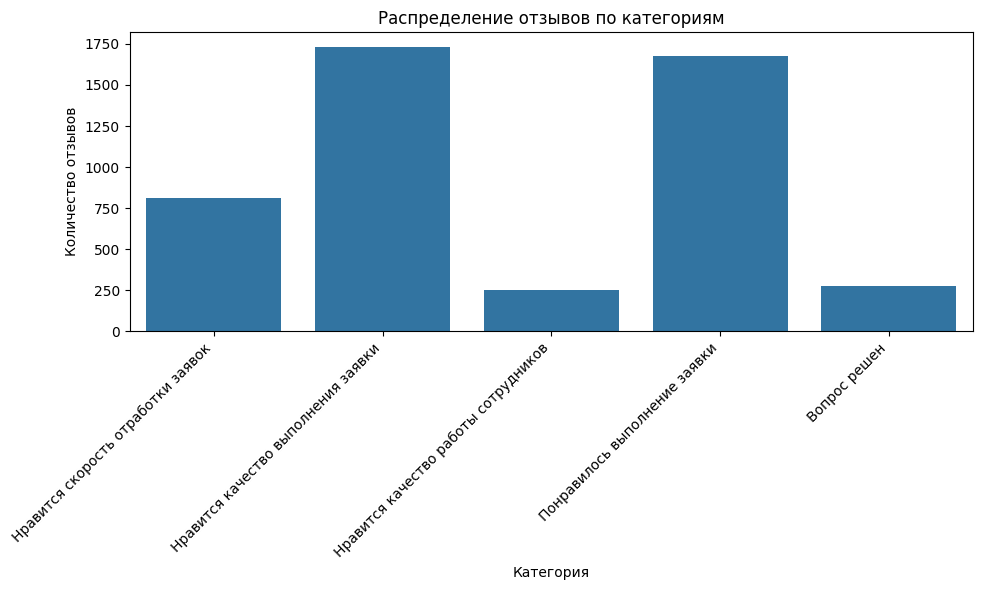

In [8]:
category_columns = ['Нравится скорость отработки заявок', 'Нравится качество выполнения заявки', 'Нравится качество работы сотрудников', 'Понравилось выполнение заявки', 'Вопрос решен']

# Проверим, что все столбцы категорий существуют
for col in category_columns:
    if col not in data.columns:
        print(f"Предупреждение: Столбец '{col}' не найден.")
        category_columns.remove(col)  # Исключаем столбец из анализа

category_counts = data[category_columns].sum()
print("\nРаспределение отзывов по категориям:")
print(category_counts)

# Визуализация распределения
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Распределение отзывов по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество отзывов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Файл 'cleaned_data_proto.csv' успешно загружен.
Общее количество отзывов: 2373

Распределение отзывов по категориям:
Нравится скорость отработки заявок       812
Нравится качество выполнения заявки     1734
Нравится качество работы сотрудников     249
Понравилось выполнение заявки           1677
Вопрос решен                             274
dtype: int64


<>:8: SyntaxWarning: invalid escape sequence '\i'
<>:8: SyntaxWarning: invalid escape sequence '\i'
C:\Users\admin\AppData\Local\Temp\ipykernel_14448\292110307.py:8: SyntaxWarning: invalid escape sequence '\i'
  data = pd.read_csv('D:\мои проекты\intensiv4\DADA\categorized_comments.csv', encoding='utf-8')  # Явно указываем кодировку


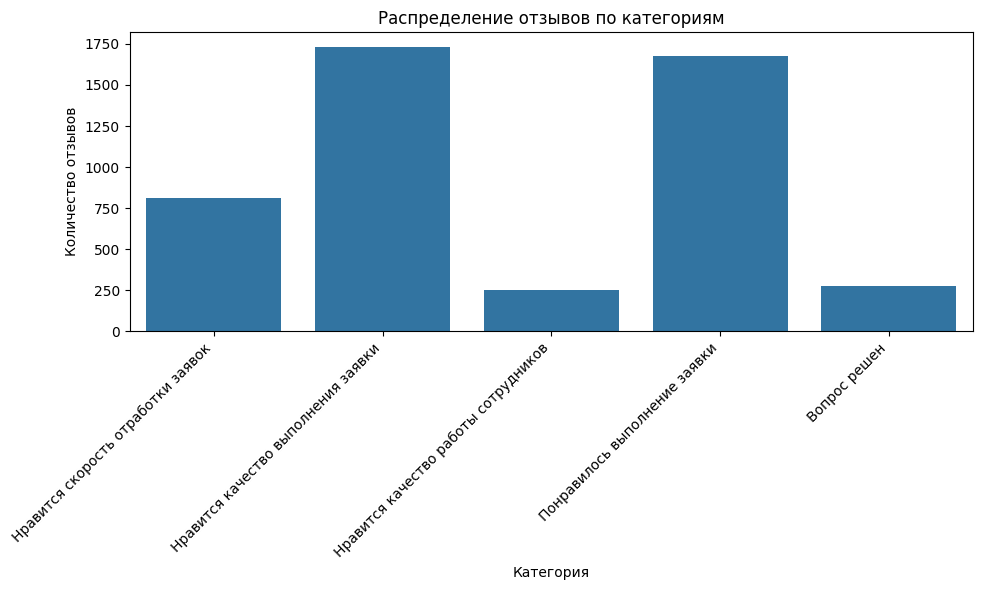


Топ-20 самых частых слов:
[('спасибо', 892), ('за', 409), ('и', 404), ('все', 276), ('быстро', 266), ('спасибо!', 252), ('не', 220), ('в', 216), ('большое', 186), ('очень', 175), ('оперативно', 167), ('на', 125), ('что', 111), ('всё', 103), ('спасибо,', 86), ('спасибо.', 82), ('благодарю', 80), ('оперативность', 77), ('мастер', 75), ('по', 71)]


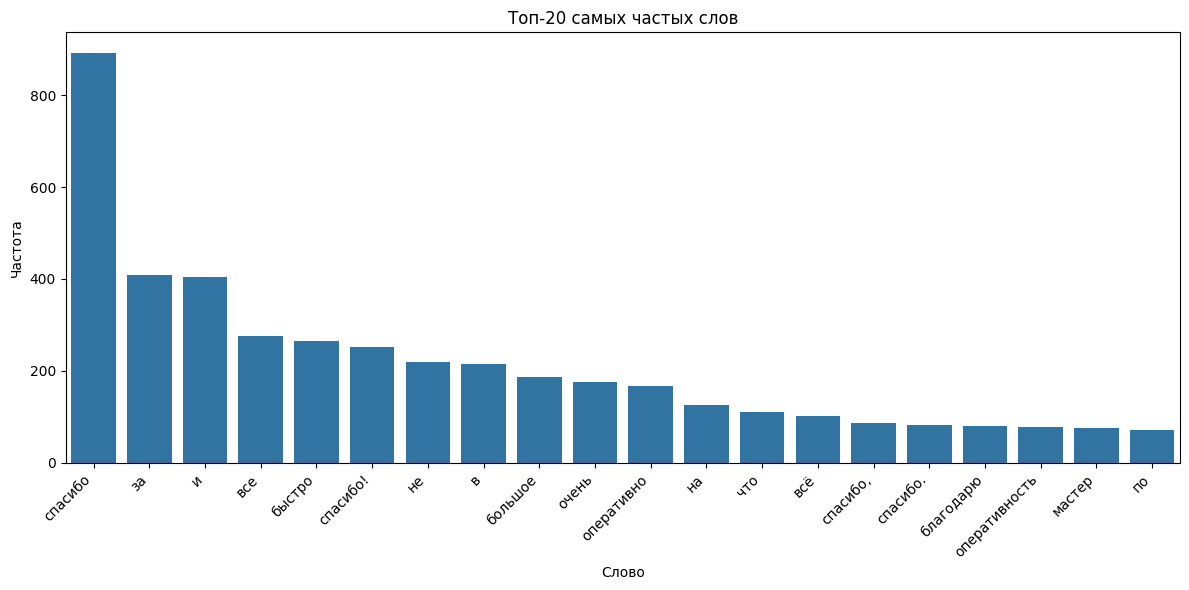

In [14]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Загрузка очищенных данных
try:
    data = pd.read_csv('D:\мои проекты\intensiv4\DADA\categorized_comments.csv', encoding='utf-8')  # Явно указываем кодировку
    print("Файл 'cleaned_data_proto.csv' успешно загружен.")
except FileNotFoundError:
    print("Ошибка: Файл 'cleaned_data_proto.csv' не найден.")
    exit()
except Exception as e:
    print(f"Ошибка при чтении файла: {e}")
    exit()

# 2. Проверка наличия столбца 'comment'
if 'comment' not in data.columns:
    print("Ошибка: Столбец 'comment' не найден.")
    print("Доступные столбцы:", data.columns)  # Выводим доступные столбцы для отладки
    exit()

# 3. Основные показатели
total_reviews = len(data)
print(f"Общее количество отзывов: {total_reviews}")

# 4. Распределение оценок (категорий)
category_columns = ['Нравится скорость отработки заявок', 'Нравится качество выполнения заявки', 'Нравится качество работы сотрудников', 'Понравилось выполнение заявки', 'Вопрос решен']

# Проверяем, что все столбцы категорий существуют и имеют числовой тип
valid_category_columns = []
for col in category_columns:
    if col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]):  # Проверяем, является ли столбец числовым
            valid_category_columns.append(col)
        else:
            print(f"Предупреждение: Столбец '{col}' не является числовым, он имеет тип {data[col].dtype}.")
    else:
        print(f"Предупреждение: Столбец '{col}' не найден.")

if not valid_category_columns:
    print("Ошибка: Ни один из столбцов категорий не найден или не является числовым.")
    exit()

category_counts = data[valid_category_columns].sum()  # Используем только валидные столбцы
print("\nРаспределение отзывов по категориям:")
print(category_counts)

# Визуализация распределения
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Распределение отзывов по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество отзывов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Анализ текста (топ-20 самых частых слов)
# Объединение всех отзывов в один текст
all_text = ' '.join(data['comment'].astype(str).tolist())  # Явно преобразуем в строку

# Разделение текста на слова
words = all_text.split()

# Подсчет частоты слов
word_counts = Counter(words)

# Топ-20 самых частых слов
top_words = word_counts.most_common(20)
print("\nТоп-20 самых частых слов:")
print(top_words)

# Визуализация топ-20 слов
top_words_df = pd.DataFrame(top_words, columns=['Слово', 'Частота'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Слово', y='Частота', data=top_words_df)
plt.title('Топ-20 самых частых слов')
plt.xlabel('Слово')
plt.ylabel('Частота')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
%pip install pymorphy2==0.8

   ---------------------------------------- 0.0/7.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.1 MB 796.4 kB/s eta 0:00:09
   -- ------------------------------------- 0.5/7.1 MB 796.4 kB/s eta 0:00:09
   ---- ----------------------------------- 0.8/7.1 MB 816.8 kB/s eta 0:00:08
   ----- ---------------------------------- 1.0/7.1 MB 762.4 kB/s eta 0:00:08
   ------- -------------------------------- 1.3/7.1 MB 867.2 kB/s eta 0:00:07
   -------- ------------------------------- 1.6/7.1 MB 954.6 kB/s eta 0:00:06
   ----------- ---------------------------- 2.1/7.1 MB 1.1 MB/s eta 0:00:05
   ------------- -------------------------- 2.4/7.1 MB 1.2 MB/s eta 0:00:04
   -------------- ------------------------- 2.6/7.1 MB 1.2 MB/s eta 0:00:04
   ---------------- --------

In [15]:
%pip install pymorphy2 nltk

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pymorphy2
print(pymorphy2.__file__)

d:\мои проекты\intensiv4\.venv\Lib\site-packages\pymorphy2\__init__.py


In [45]:
import pandas as pd

# Загружаем данные
file_path = 'D:\мои проекты\intensiv4\coment.csv'
try:
    data = pd.read_csv(file_path, encoding='utf-8', engine='python')
    print(f"Файл '{file_path}' успешно загружен.")
except FileNotFoundError:
    print(f"Ошибка: Файл '{file_path}' не найден.")
    exit()
except Exception as e:
    print(f"Ошибка при чтении файла: {e}")
    exit()

if data is not None:
    # Переименование столбца, если он существует
    if 'Текст комментария' in data.columns:
        data = data.rename(columns={'Текст комментария': 'comment'})

    # Проверка наличия столбца 'comment'
    if 'comment' not in data.columns:
        print("Ошибка: Столбец 'comment' не найден.")
        exit()

    # Удаление дубликатов
    data.drop_duplicates(inplace=True)

    # Заполнение пропущенных значений в столбце 'comment'
    data['comment'] = data['comment'].fillna('')

    # Очищаем текст
    data['comment'] = data['comment'].apply(clean_text)

    # Применяем функцию разметки и создаем новые столбцы
    categorized = data['comment'].apply(categorize_comment)
    data["speed"] = categorized.apply(lambda x: x["speed"])
    data["quality"] = categorized.apply(lambda x: x["quality"])
    data["staff"] = categorized.apply(lambda x: x["staff"])
    data["execution"] = categorized.apply(lambda x: x["execution"])
    data["solved"] = categorized.apply(lambda x: x["solved"])

    # Анализируем результаты
    print(data[["comment", "speed", "quality", "staff", "execution", "solved"]].head(20))

    # Выводим статистику по категориям
    print("\nСтатистика по категориям:")
    print(data[["speed", "quality", "staff", "execution", "solved"]].sum())

    # Сохраняем результаты в новый файл
    data.to_csv("categorized_comments.csv", encoding='utf-8', index=False)
else:
    print("Не удалось загрузить данные. Проверьте путь к файлу и его содержимое.")

Файл 'D:\мои проекты\intensiv4\coment.csv' успешно загружен.
                                              comment  speed  quality  staff  \
0                                             спасибо  False    False   True   
1                                            спасибо!  False    False   True   
2                                             отлично  False     True  False   
3         благодарю за оперативное решение проблемы !   True    False  False   
4               прекрасный специалист! побольше таких  False    False   True   
5                                             спасибо  False    False   True   
6                                пересчет, и скорость  False    False  False   
7                 спасибо за обновление покраски стен  False    False   True   
8                                    выполнили быстро   True    False  False   
9                                            спасибо!  False    False   True   
10  спасибо управляющей компании за то что прислал...   Tru

<>:4: SyntaxWarning: invalid escape sequence '\i'
<>:4: SyntaxWarning: invalid escape sequence '\i'
C:\Users\admin\AppData\Local\Temp\ipykernel_15532\1138243764.py:4: SyntaxWarning: invalid escape sequence '\i'
  file_path = 'D:\мои проекты\intensiv4\coment.csv'


Файл 'categorized_comments.csv' успешно загружен.


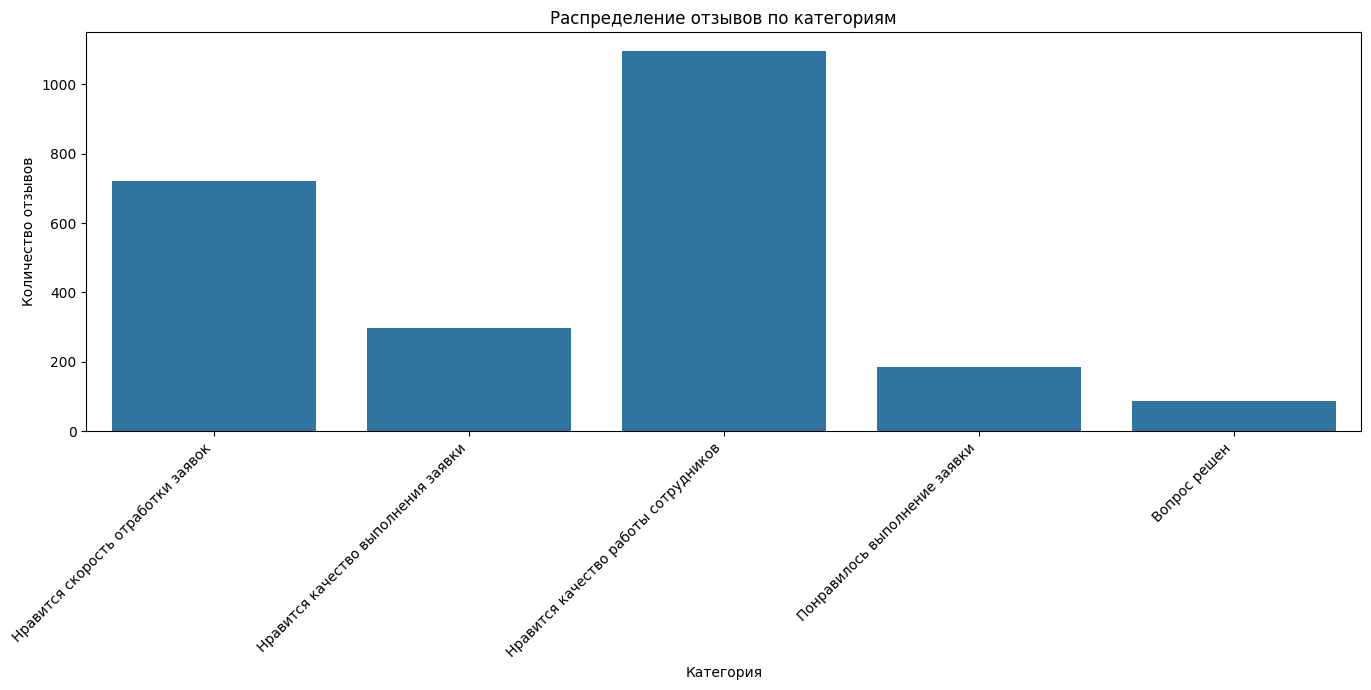

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
try:
    data = pd.read_csv("categorized_comments.csv", encoding='utf-8')
    print("Файл 'categorized_comments.csv' успешно загружен.")
except FileNotFoundError:
    print("Ошибка: Файл 'categorized_comments.csv' не найден. Сначала запусти скрипт категоризации!")
    exit()

# Подсчет количества отзывов в каждой категории
category_counts = data[["speed", "quality", "staff", "execution", "solved"]].sum()

# Названия категорий для отображения на графике
category_names = ['Нравится скорость отработки заявок', 'Нравится качество выполнения заявки', 'Нравится качество работы сотрудников', 'Понравилось выполнение заявки', 'Вопрос решен']

# Визуализация распределения
plt.figure(figsize=(14, 7)) # Увеличим размер графика для лучшей читаемости
sns.barplot(x=category_names, y=category_counts.values)  # Используем category_names
plt.title("Распределение отзывов по категориям")
plt.xlabel("Категория")
plt.ylabel("Количество отзывов")
plt.xticks(rotation=45, ha="right", fontsize=10)  # Поворачиваем названия для читаемости, регулируем размер шрифта
plt.tight_layout()  # Автоматически корректирует параметры подложки
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\i'
<>:7: SyntaxWarning: invalid escape sequence '\i'
C:\Users\admin\AppData\Local\Temp\ipykernel_5288\632089940.py:7: SyntaxWarning: invalid escape sequence '\i'
  data = pd.read_csv("D:\мои проекты\intensiv4\coment.csv", encoding='utf-8')  # Загружаем исходный файл


Файл 'coment.csv' успешно загружен.


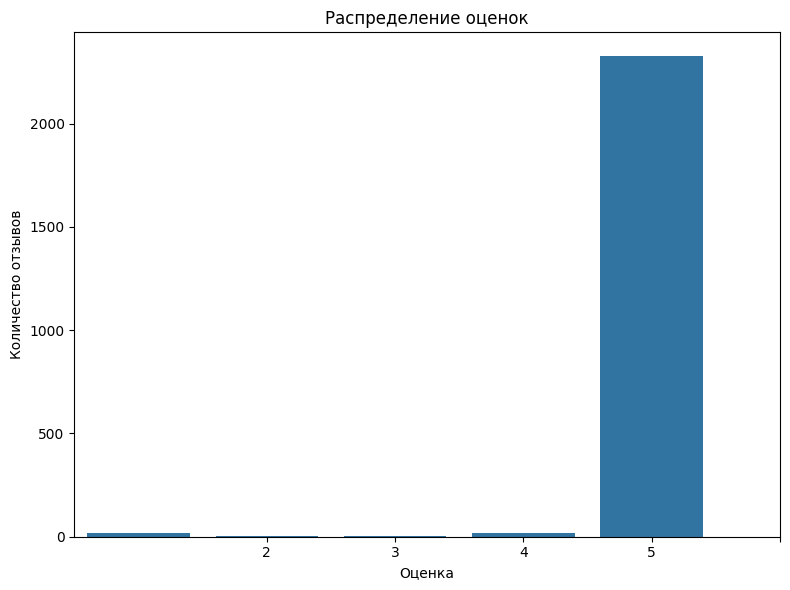

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
try:
    data = pd.read_csv("D:\мои проекты\intensiv4\coment.csv", encoding='utf-8')  # Загружаем исходный файл
    print("Файл 'coment.csv' успешно загружен.")
except FileNotFoundError:
    print("Ошибка: Файл 'coment.csv' не найден.")
    exit()
except Exception as e:
    print(f"Ошибка при чтении файла: {e}")
    exit()

# Проверяем наличие столбца "Оценка"
if 'rating' not in data.columns:
    print("Ошибка: Столбец 'Оценка' не найден в файле 'coment.csv'.")
    exit()

# Подсчет количества оценок каждого типа
rating_counts = data['rating'].value_counts().sort_index()  # Сортируем по индексу (1, 2, 3, 4, 5)

# Визуализация распределения оценок
plt.figure(figsize=(8, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title("Распределение оценок")
plt.xlabel("Оценка")
plt.ylabel("Количество отзывов")
plt.xticks(range(1, 6))  # Устанавливаем значения на оси X (1, 2, 3, 4, 5)
plt.tight_layout()
plt.show()